01. Data Extraction

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

link = 'amz_uk_price_prediction_dataset.csv'
data = pd.read_csv(link)
df = data.copy()

## Data Cleaning

In [28]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

## Data Prepocessing

In [29]:
round(df.describe())
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [30]:
""" **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)? """
    
#Frequency tables

# option 1
frequency_table_category = df['category'].value_counts()
frequency_table_category

# option 1
frequency_crosstab = pd.crosstab(index=df['category'], columns="Count")
print(frequency_crosstab)

# top_5_categories
top_5_categories = frequency_table_category = df['category'].value_counts().head()
top_5_categories


col_0                           Count
category                             
3D Printers                       248
3D Printing & Scanning           4067
Abrasive & Finishing Products     250
Action Cameras                   1697
Adapters                          254
...                               ...
Wind Instruments                  250
Window Treatments                 239
Women                           17772
Women's Sports & Outdoor Shoes   1959
eBook Readers & Accessories       246

[296 rows x 1 columns]


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

## Data Visualization - Bar Plot 

#### Column Chart

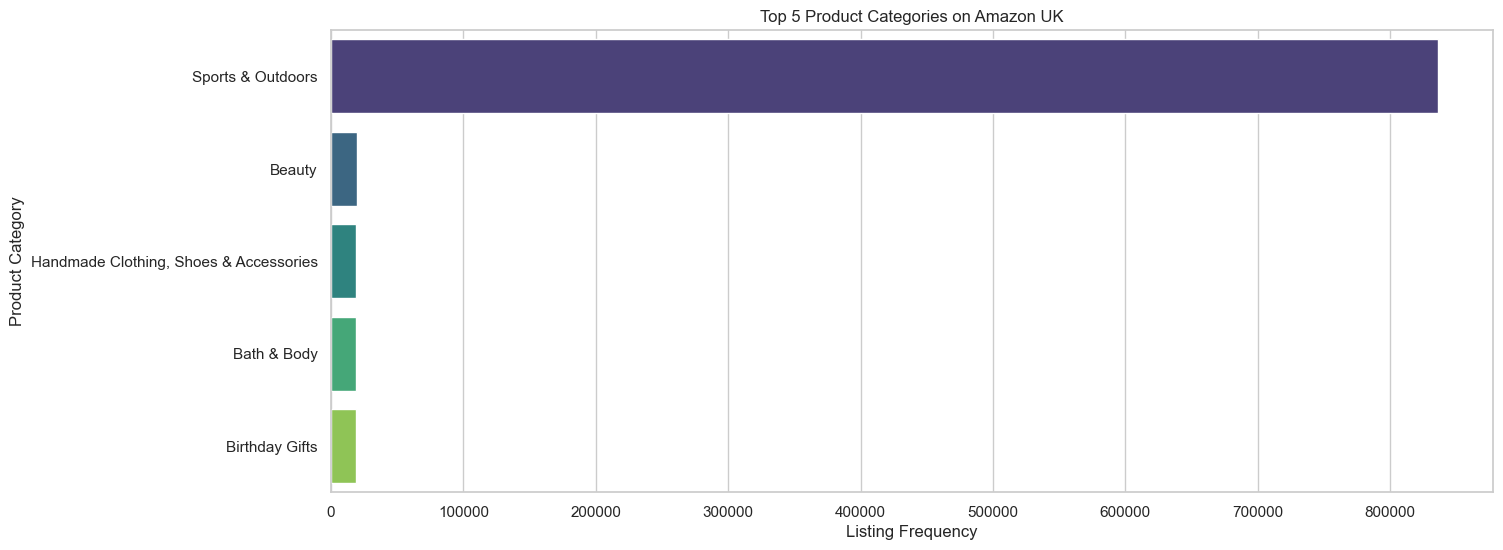

In [31]:
# visualization of the top 5 categories

plt.figure(figsize=(15,6))
ax = sns.barplot(
    x=top_5_categories.values,
    y=top_5_categories.index,
    hue=top_5_categories.index,
    palette='viridis',
    legend=False
)

plt.title('Top 5 Product Categories on Amazon UK')
plt.xlabel('Listing Frequency')
plt.ylabel('Product Category')

plt.show()

#### Pie Chart

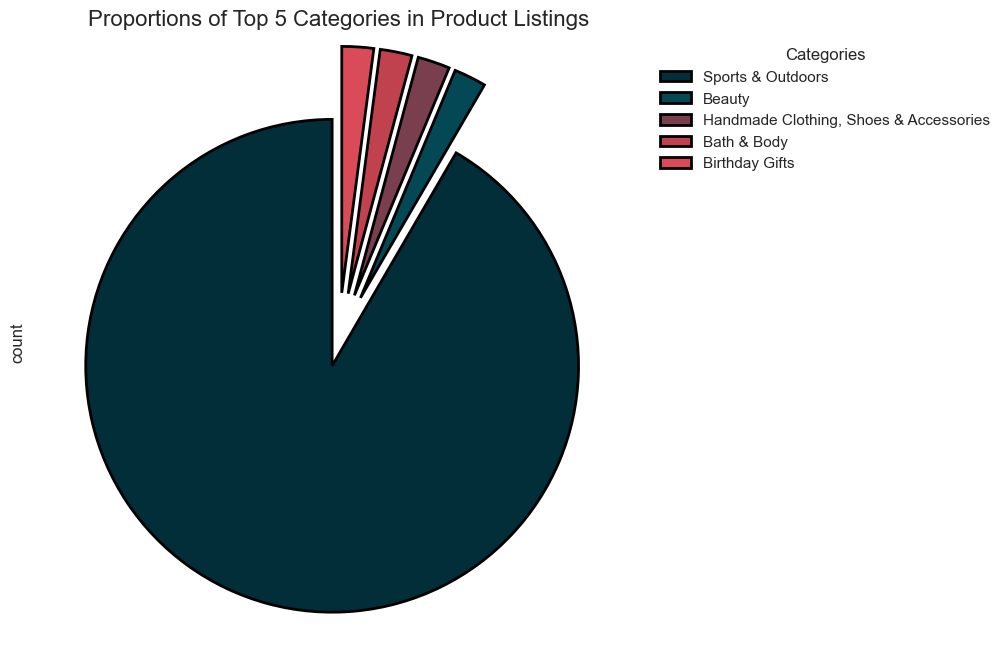

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


top_5_categories = df['category'].value_counts().head()
top_5_categories = top_5_categories / top_5_categories.sum()
colors = ['#022e39', '#044855', '#793f4e', '#c0424e', '#d94b58']
sns.set_theme(style="whitegrid")  # Clean and grid-like background


plt.figure(figsize=(10, 8))


explode = (0.1, 0.2, 0.2, 0.2, 0.2)


ax = top_5_categories.plot(kind='pie', labels=None, startangle=90, 
                        colors=colors, explode=explode, 
                        wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'linestyle': 'solid'})


plt.title("Proportions of Top 5 Categories in Product Listings", fontsize=16)
plt.legend(top_5_categories.index, title="Categories", loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.show()



### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality

In [33]:
""" **Measures of Centrality**:
- Calculate the mean, median, and mode for the `price` of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?"""

# the mode is lower than the mean and the average
mean_product_price = round(df['price'].mean())
median_product_price = round(df['price'].median())
mode_product_price = round(df['price'].mode())


print("mean:", mean_product_price)
print("median:", median_product_price)
print("mode:",mode_product_price)


mean: 89
median: 19
mode: 0    10.0
Name: price, dtype: float64


#### Measures of Dispersion

variance + standard deviation

In [34]:
"""**Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?"""

statitics_product_price = round(df['price'].describe().T)
statitics_product_price

round(df['price'].var())
st_dev = round(df['price'].std())


outliers_check_under_limit = df['price'].mean() - 2 *st_dev
outliers_check_upper_limit = df['price'].mean() + 2 *st_dev

outliers_check = df[(df['price'] < outliers_check_under_limit) | (df['price'] > outliers_check_upper_limit)]

# everything outside this interval it will be conisder a outlier - on l
print(f"Limite inferior (2 desvios padrão abaixo da média): {outliers_check_under_limit}") # 46
print(f"Limite superior (2 desvios padrão acima da média): {outliers_check_upper_limit}") # 104



Limite inferior (2 desvios padrão abaixo da média): -602.7561905607633
Limite superior (2 desvios padrão acima da média): 781.2438094392367


interquartile range

In [35]:
Q1 = df['price'].quantile(0.25)  
Q3 = df['price'].quantile(0.75) 
IQR = Q3 - Q1

print(f"Interquartile Range (IQR): {IQR}")

min_price = df['price'].min()
max_price = df['price'].max()

price_range = max_price - min_price

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")



Interquartile Range (IQR): 36.0
Minimum Price: 0.0
Maximum Price: 100000.0
Price Range: 100000.0


## Data Visualization

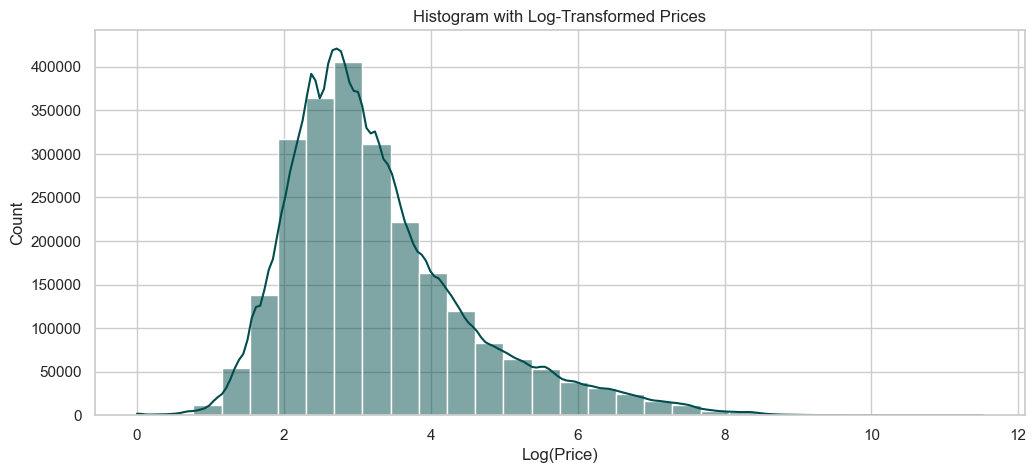

In [36]:
import numpy as np


df['log_price'] = np.log1p(df['price']) 


plt.figure(figsize=(12, 5))
sns.histplot(df['log_price'], kde=True, color='#004c4c', bins=30)
plt.title('Histogram with Log-Transformed Prices')
plt.xlabel('Log(Price)')
plt.show()


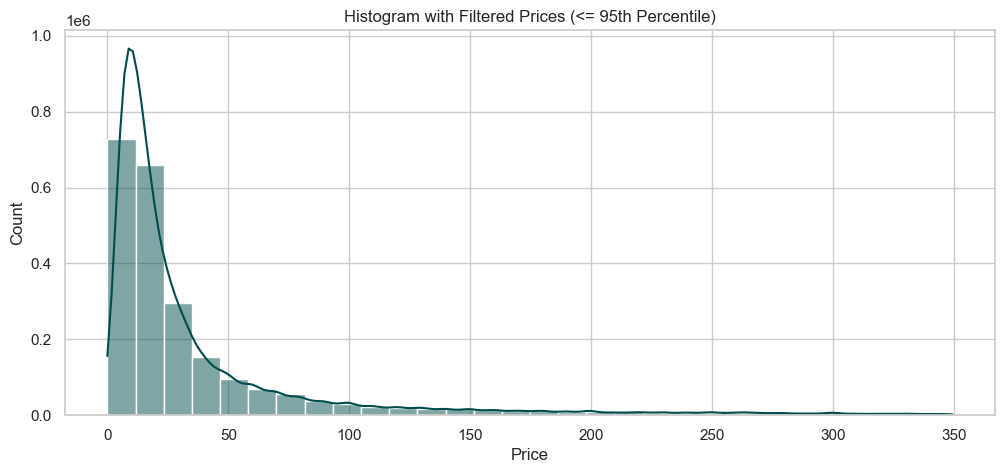

In [37]:

threshold = df['price'].quantile(0.95)
# Filter dataset
filtered_df = df[df['price'] <= threshold]

plt.figure(figsize=(12, 5))
sns.histplot(filtered_df['price'], kde=True, color='#004c4c', bins=30)
plt.title('Histogram with Filtered Prices (<= 95th Percentile)')
plt.xlabel('Price')
plt.show()


### Checking for OUTLIERS - bOXPLOT

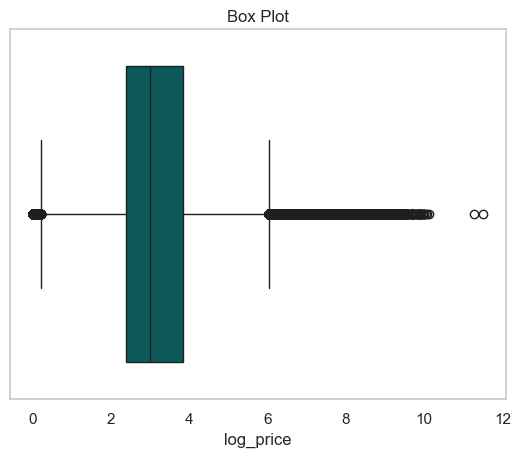

In [38]:
#Boxplot
import numpy as np
df['log_price'] = np.log1p(df['price']) 


sns.boxplot(x=df['log_price'], color='#006666')
plt.title('Box Plot')
plt.grid(False)  # Disable gridlines
plt.show()


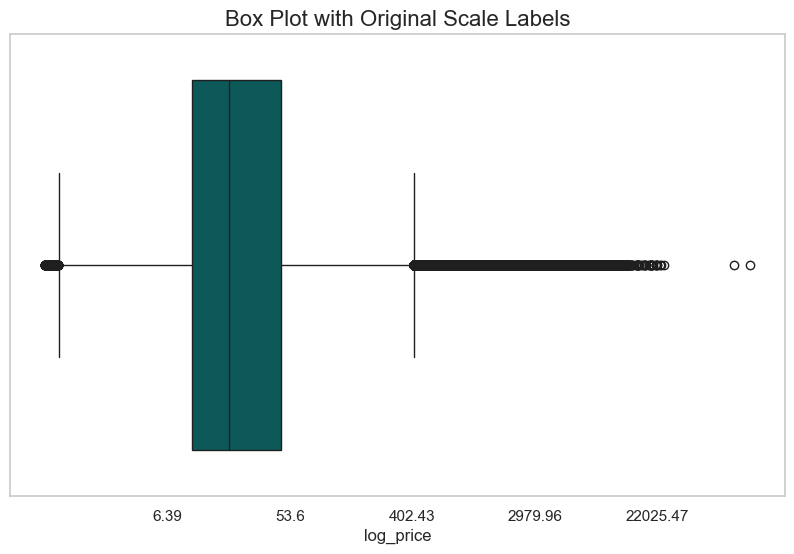

In [39]:

# Log-transform the price with the original prices

df['log_price'] = np.log1p(df['price'])
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_price'], color='#006666')
plt.title('Box Plot with Original Scale Labels', fontsize=16)
original_ticks = [2, 4, 6, 8, 10]  
converted_ticks = [round(np.expm1(tick), 2) for tick in original_ticks]  
plt.xticks(ticks=original_ticks, labels=converted_ticks)
plt.grid(False)

# Show the plot
plt.show()


In [40]:
from scipy.stats import skew
# right skew / positive 

skewness_value = skew(df['price'])
skewness_value

np.float64(27.492960690108827)

In [41]:
from scipy.stats import zscore


z_scores = zscore(df['price'])
outliers_z = df[(z_scores < -2) | (z_scores > 2)]
num_outliers = len(outliers_z)
print(f"Number of  outliers: {num_outliers}")


Number of  outliers: 53976


In [42]:
from scipy.stats import shapiro
stat, p = shapiro(df['price'])
print("Shapiro-Wilk Test p-value:", p)
if p > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Shapiro-Wilk Test p-value: 2.4261115938986633e-239
Data is not normally distributed


C:\Users\meite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2443651.
  res = hypotest_fun_out(*samples, **kwds)


### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [53]:
""" **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend? """
    
mean_df_rating = df['stars'].mean()
mode_df_rating = df['stars'].mode()
median_df_rating = df['stars'].median()

print("mean_df_rating",mean_df_rating)
print("mode_df_rating",mode_df_rating)
print("median_df_rating",median_df_rating)

mean_df_rating 2.152836472966065
mode_df_rating 0    0.0
Name: stars, dtype: float64
median_df_rating 0.0


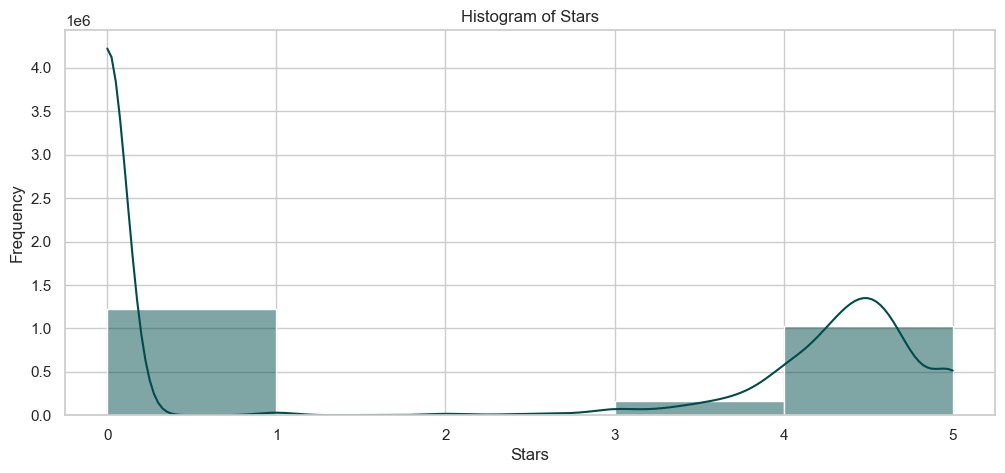

In [54]:
plt.figure(figsize=(12, 5))
sns.histplot(df['stars'], kde=True, color='#004c4c', bins=5)
plt.title('Histogram of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()


stars
0.0    1225641
1.0       8484
1.1          3
1.2         23
1.3         78
1.4        149
1.5        404
1.6        147
1.7        177
1.8        249
1.9        300
2.0       3901
2.1        540
2.2        602
2.3        734
2.4       1060
2.5       2103
2.6       1579
2.7       2104
2.8       2306
2.9       3341
3.0      12819
3.1       4679
3.2       5771
3.3       8269
3.4      10355
3.5      14673
3.6      16219
3.7      21137
3.8      27876
3.9      36555
4.0      66089
4.1      65115
4.2      86871
4.3     112564
4.4     136165
4.5     151577
4.6     136995
4.7      94566
4.8      41858
4.9      11081
5.0     128492
Name: count, dtype: int64


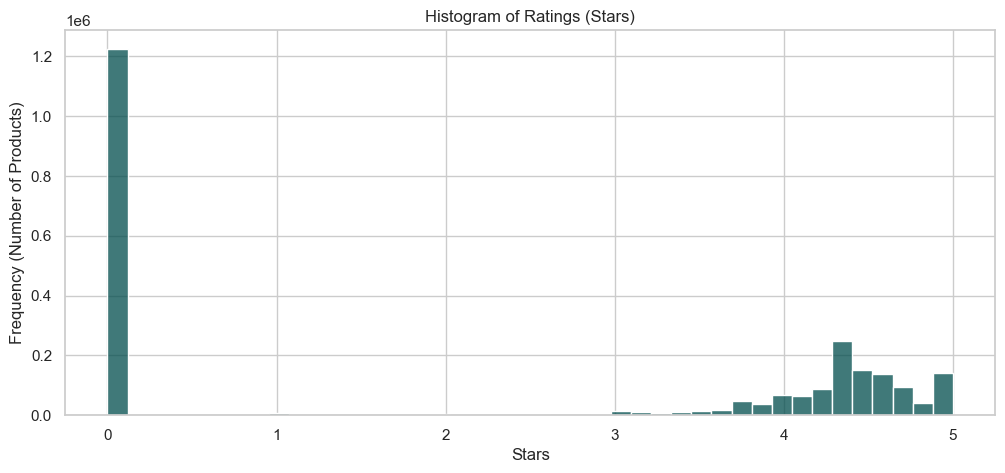

In [48]:
# Calculando a frequência de cada valor em stars
frequency = df['stars'].value_counts().sort_index()

print(frequency)  # Exibe a frequência por rating

# Criando o histograma
plt.figure(figsize=(12, 5))
sns.histplot(df['stars'], kde=False, color='#004c4c', bins=int(df['stars'].nunique()))
plt.title('Histogram of Ratings (Stars)')
plt.xlabel('Stars')
plt.ylabel('Frequency (Number of Products)')
plt.show()



Medidas de Dispersão:
Variância: 4.817434029796862
Desvio Padrão: 2.1948653785134207
Intervalo Interquartil (IQR): 4.4

Forma da Distribuição:
Skewness: 0.08120730776283354
Kurtosis: -1.926004642549839


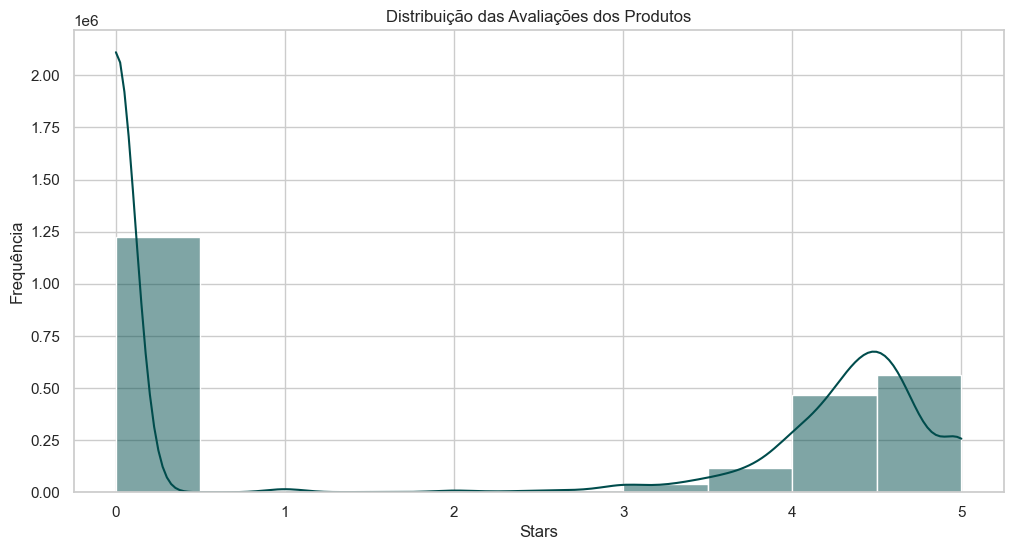

In [57]:
from scipy.stats import skew, kurtosis

variance_stars = df['stars'].var()
std_deviation_stars = df['stars'].std()
iqr_stars = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print("\nMedidas de Dispersão:")
print(f"Variância: {variance_stars}")
print(f"Desvio Padrão: {std_deviation_stars}")
print(f"Intervalo Interquartil (IQR): {iqr_stars}")

skewness_stars = skew(df['stars'], nan_policy='omit')
kurtosis_stars = kurtosis(df['stars'], nan_policy='omit')

print("\nForma da Distribuição:")
print(f"Skewness: {skewness_stars}")
print(f"Kurtosis: {kurtosis_stars}")

plt.figure(figsize=(12, 6))
sns.histplot(df['stars'], kde=True, color='#004c4c', bins=10)
plt.title('Distribuição das Avaliações dos Produtos')
plt.xlabel('Stars')
plt.ylabel('Frequência')
plt.show()

